# Алгоритм Гирвана-Ньюмена. Лувенский алгоритм.

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 3: Выделение сообществ"
* Документация:
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.modularity.html
    * https://matplotlib.org/stable/users/explain/colors/colormaps.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html

## Вопросы для совместного обсуждения

1\. Обсудите принцип работы алгоритма Гирвана-Ньюмена и Лувенского алгоритма и реализации этих алгоритмов в `networkx.`

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Считайте сеть из файла `communities.edgelist`. Выполните разбиение сети на 2 сообщества с помощью алгоритма Гирвана-Ньюмена. Визуализируйте результат, раскрасив узлы в цвет, соответствующий их сообществу.

- [ ] Проверено на семинаре

In [4]:
import pandas as pd
import networkx as nx
import random
import seaborn as sns
import matplotlib.pyplot as plt

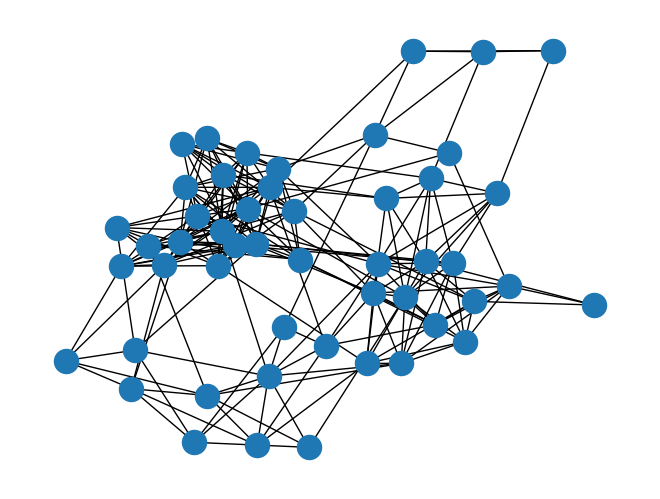

In [5]:
G=nx.read_edgelist('data (1)/data/communities.edgelist')
nx.draw(G, pos=nx.spring_layout(G))

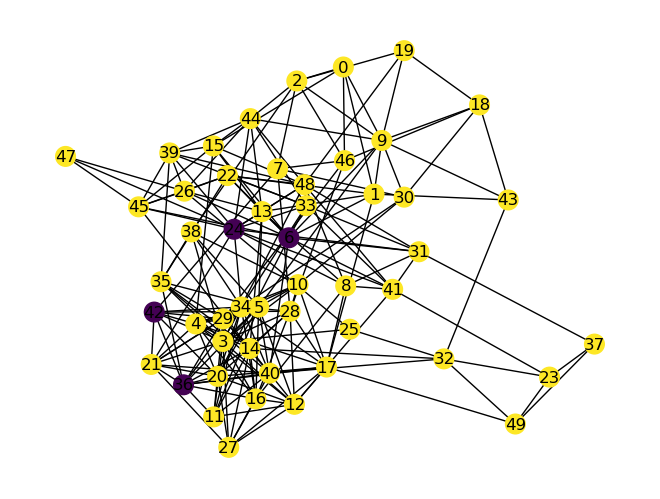

In [6]:
sub= nx.community.girvan_newman(G)

colors = [0] * (G.number_of_nodes())
colors_ = [0] * (G.number_of_edges())
for i, s in enumerate(list(sub)[0]):
    for n in s:
        colors[int(n)-1] = i*100
        colors_[int(n)-1] = i*100

nx.draw(G, node_size=200 ,node_color=colors, with_labels=True)

<p class="task" id="2"></p>

2\. Постройте график динамики модулярности для шагов алгоритма Гирвана-Ньюмена. Визуализируйте разбиение сети из предыдущей задачи, при котором достигается наилучшее значение модулярности (выведите это значение на экран). Для визуализации выберите несколько цветов (в соответствии с количеством выделенных сообществ) и раскрасьте узлы __и связи__ в рамках одного сообщества этими цветами. Связи между узлами, состоящими в разных сообществах, отрисуйте черным цветом. 

- [ ] Проверено на семинаре

In [7]:
sub= nx.community.girvan_newman(G)
sub

<generator object girvan_newman at 0x00000205CCABE740>

In [8]:
max=-10
gr=[]
for s in sub:
    gr.append(nx.community.modularity(G, s))
    if nx.community.modularity(G, s)>max: 
        max=nx.community.modularity(G, s)
        best=s
        
print(best, max)

({'23', '32', '37', '49'}, {'26', '15', '44', '39', '47', '25', '22', '6', '8', '24', '45', '33', '41', '13', '31', '48'}, {'4', '12', '40', '27', '14', '36', '34', '17', '11', '20', '21', '35', '16', '10', '38', '5', '29', '42', '3', '28'}, {'1', '0', '43', '7', '9', '46', '19', '2', '30', '18'}) 0.4315950788751715


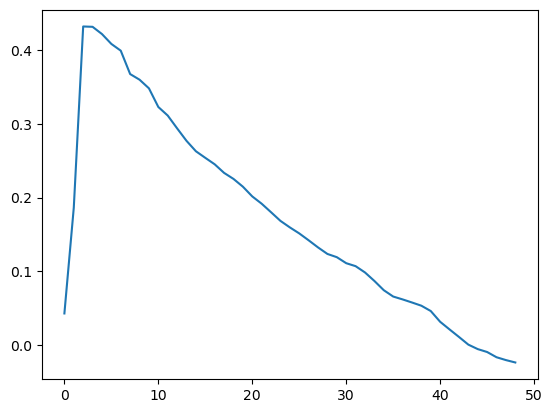

In [9]:
plt.plot(gr)

In [10]:
import matplotlib.colors as mcolors
col={}
for n, i, in enumerate(mcolors.BASE_COLORS.keys()):
    col[n]=i

In [11]:
node_colors = {}
edge_colors = []

for i, c in enumerate(best):
    color = col[i]
    for node in c:
        node_colors[node] = color

for u, v in G.edges():
    u_c = None
    v_c = None

    for i, c in enumerate(best):
        if u in c:
            u_c = i
        if v in c:
            v_c = i

    if u_c == v_c: 
        edge_colors.append(col[u_c])
    else: 
        edge_colors.append('black')

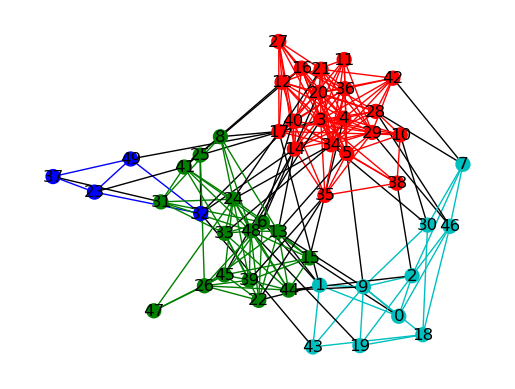

In [12]:
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_color=[node_colors[node] for node in G.nodes()], node_size=100)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()

<p class="task" id="3"></p>

3\. Выполните разбиение сети из первого задания на сообщества с помощью Лувенского алгоритма. Визуализируйте результат аналогично предыдущему заданию.

- [ ] Проверено на семинаре

In [13]:
sub_l= nx.community.louvain_communities(G)
sub_l

[{'23', '25', '32', '37', '49'},
 {'13',
  '15',
  '22',
  '24',
  '26',
  '31',
  '33',
  '39',
  '41',
  '44',
  '45',
  '47',
  '48',
  '6',
  '8'},
 {'0', '1', '18', '19', '2', '30', '43', '46', '7', '9'},
 {'10',
  '11',
  '12',
  '14',
  '16',
  '17',
  '20',
  '21',
  '27',
  '28',
  '29',
  '3',
  '34',
  '35',
  '36',
  '38',
  '4',
  '40',
  '42',
  '5'}]

In [14]:
node_colors = {}
edge_colors = []

for i, c in enumerate(sub_l):
    color = col[i]
    for node in c:
        node_colors[node] = color

for u, v in G.edges():
    u_c = None
    v_c = None

    for i, c in enumerate(sub_l):
        if u in c:
            u_c = i
        if v in c:
            v_c = i

    if u_c == v_c: 
        edge_colors.append(col[u_c])
    else: 
        edge_colors.append('black')

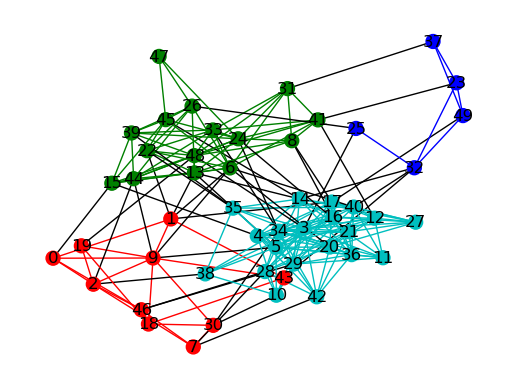

In [15]:
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_color=[node_colors[node] for node in G.nodes()], node_size=100)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()

<p class="task" id="4"></p>

4\. Постройте матрицу смежности для сети. Постройте матрицу смежности для сети, в которой узлы перенумерованы в порядке возрастания номера сообщества, которому они принадлежат (т.е. номера $0...C_1-1$ даются $C_1$ узлам, принадлежащим первому сообществу; номера $C_1...C_2-1$ даются $C_2$ узлам, принадлежащим второму сообществу и т.д.). Для разбиения графа на сообщества воспользуйтесь Лувенским алгоритмом.

Визуализируйте две матрицы смежности при помощи `seaborn.heatmap`. Расположите рисунки рядом по горизонтали, добавьте названия рисунков. Сравните полученные изображения и сделайте выводы.

- [ ] Проверено на семинаре

In [16]:
A = nx.to_numpy_array(G)

In [17]:
sub_l= nx.community.louvain_communities(G)
sub_list={}
for k, i in enumerate(sub_l):
    for  j in i:
        sub_list[j]=k

In [18]:
mask={}
for ind, (k, v) in enumerate(sub_list.items()):
    mask[k]=ind   

In [19]:
new_G=nx.relabel_nodes(G, mask)

In [23]:
A_new = nx.adjacency_matrix(new_G, nodelist = sorted(list(new_G.nodes()))).todense()
A_new

C:\Users\Elena\AppData\Local\Temp\ipykernel_12360\1966204526.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A_new = nx.adjacency_matrix(new_G, nodelist = sorted(list(new_G.nodes()))).todense()


matrix([[0, 0, 1, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 1, 1, 0]], dtype=int32)

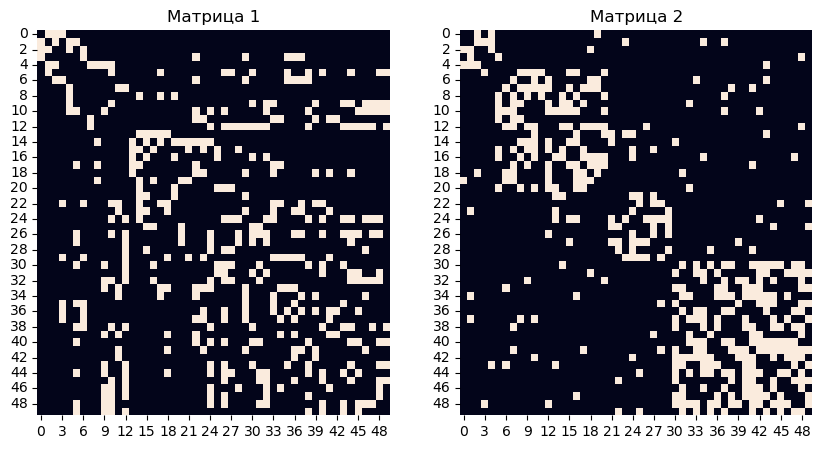

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.heatmap(A, cbar=False, ax=axes[0])
axes[0].set_title("Матрица 1")

sns.heatmap(A_new, cbar=False, ax=axes[1])
axes[1].set_title("Матрица 2")

plt.show()

<p class="task" id="5"></p>

5\. Оформите результаты работы алгоритмов в виде таблицы

| Алгоритм                      | Средняя плотность сообществ | Модулярность | Покрытие | Эффективность |
|-------------------------------|-----------------------------|--------------|----------|----------|
| Гирвана-Ньюмена              |                             |              |          |          |
| Лувенский                     |                             |              |          |          |

Для представления данных в табличном виде используйте `pandas`. Для алгоритма Гирвана-Ньюмена берите разбиение, максимизирующее модулярность. Все расчеты метрик при решении этой задачи выполните повторно.

- [ ] Проверено на семинаре

In [86]:
import numpy as np
import pandas as pd

In [87]:
density=[]
for i in best:
    density.append(nx.density(G.subgraph(i)))
d1=['Гирвана-Ньюмена', np.mean(density), nx.community.modularity(G, best), nx.community.partition_quality(G, best)[0], nx.community.partition_quality(G, best)[1]]

In [88]:
density=[]
for i in sub_l:
    density.append(nx.density(G.subgraph(i)))
d2=['Лувенский', np.mean(density), nx.community.modularity(G, sub_l), nx.community.partition_quality(G, sub_l)[0], nx.community.partition_quality(G, sub_l)[1]]

In [89]:
df=pd.DataFrame([d1, d2], columns=['Алгоритм', 'Средняя плотность сообществ', 'Модулярность', 'Покрытие', 'Эффективность'])

In [90]:
df

,Алгоритм,Средняя плотность сообществ,Модулярность,Покрытие,Эффективность
0,Гирвана-Ньюмена,0.558808,0.431595,0.814815,0.816327
1,Лувенский,0.513868,0.435228,0.814815,0.825306
